In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [35]:
def process_csvs(path, record):
    df = pd.DataFrame(columns=['is_record', 'cpu_usage', 'gpu_usage'])
    df['cpu_usage'] = pd.read_csv(os.path.join(path, 'host_sys_metrics.log'))['cpu.percent']
    df['gpu_usage'] = pd.read_csv(os.path.join(path, 'host_gpu_metrics.log'))['memoryUtil'] * 100
    df['is_record'] = record
    return df    
    

def process_cpu_gpu():
    df_aggregated = pd.DataFrame(columns=['is_record', 'cpu_usage', 'gpu_usage'])
    for root, dirs, files in os.walk(".\\Quest-2\\BeatSaber-W\\PopStars-Medium", topdown=False):
        for dir in dirs:
            df_aggregated = pd.concat([df_aggregated, process_csvs(os.path.join(root, dir), 'record' in dir)])
    return df_aggregated

    # normalized energy consumption for better comparison

In [36]:
new = process_cpu_gpu()
new

C:\Users\radua\AppData\Local\Temp\ipykernel_37172\4269962685.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_aggregated = pd.concat([df_aggregated, process_csvs(os.path.join(root, dir), 'record' in dir)])


,is_record,cpu_usage,gpu_usage
0,True,27.8,59.811106
1,True,20.6,69.744341
2,True,6.8,66.593389
3,True,6.9,66.593389
4,True,8.3,66.593389
...,...,...,...
230,False,18.1,27.324540
231,False,17.3,27.324540
232,False,18.2,27.373392
233,False,17.1,27.373392


In [46]:
plt.rcParams['font.family'] = 'Arial'
sns.set_style("darkgrid")
sns.set_palette("deep")

C:\Users\radua\AppData\Local\Temp\ipykernel_37172\356190273.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="is_record", y="cpu_usage", data=new, palette="deep", inner='quartile')
C:\Users\radua\AppData\Local\Temp\ipykernel_37172\356190273.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Replay', 'Record'])


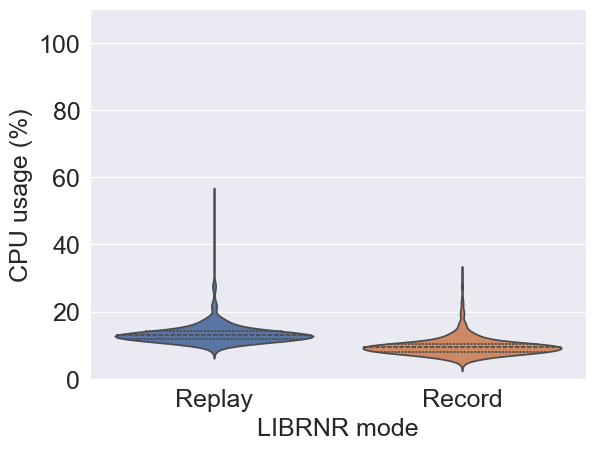

In [53]:
# violin plot for cpu usage
plt.rcParams.update({'font.size': 18})

ax = sns.violinplot(x="is_record", y="cpu_usage", data=new, palette="deep", inner='quartile')
ax.set_xticklabels(['Replay', 'Record'])
plt.ylim(0, 110)
plt.xlabel('LIBRNR mode')
plt.ylabel('CPU usage (%)')
plt.show()


C:\Users\radua\AppData\Local\Temp\ipykernel_37172\1353114909.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="is_record", y="gpu_usage", data=new, palette="deep", inner='quartile')
C:\Users\radua\AppData\Local\Temp\ipykernel_37172\1353114909.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Replay', 'Record'])


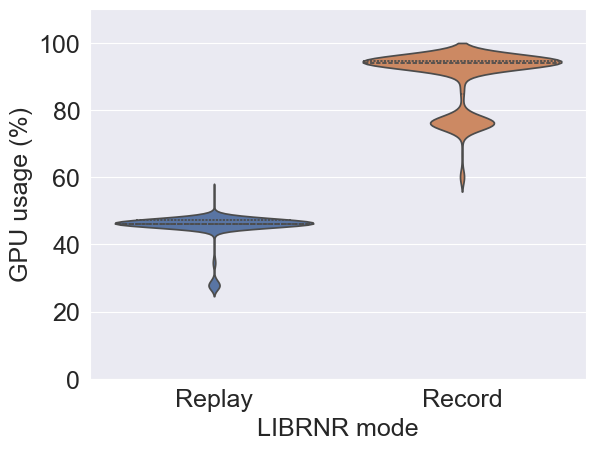

In [52]:
# violin plot for gpu usage
ax = sns.violinplot(x="is_record", y="gpu_usage", data=new, palette="deep", inner='quartile')
ax.set_xticklabels(['Replay', 'Record'])
plt.ylim(0, 110)
plt.xlabel('LIBRNR mode')
plt.ylabel('GPU usage (%)')
plt.show()
